In [92]:
import numpy as np
import pandas as pd
import geopandas as gpd
import googlemaps
import requests
import json
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
def load_api(path="confidential.json"):
	with open(path) as f:
		data = json.load(f)
	return data.get("api_key", "API key not found")
	
api_key = load_api()

In [3]:
# zip_tract = pd.read_excel("D:\Download\HVIprediction\ZIP_TRACT_122024.xlsx")
# zip_tract = zip_tract[zip_tract['USPS_ZIP_PREF_STATE'] == 'NJ']
# zip_tract.to_csv("D:\Download\HVIprediction\ZIP_TRACT_122024_NJ.csv", index=False)

In [5]:
zip_tract = pd.read_csv("D:\Download\HVIprediction\data\ZIP_TRACT_122024_NJ.csv")
# zip_tract = zip_tract.sort_values(by=['TRACT', 'RES_RATIO'], ascending=[True, False])
# zip_tract = zip_tract.drop_duplicates(subset='TRACT', keep='first')
# zip_tract = zip_tract[['TRACT', 'ZIP']]
# zip_tract = zip_tract.rename(columns={'TRACT': 'GEOID', 'ZIP': 'ZCTA'})
zip_tract.to_csv("D:\Download\HVIprediction\data\ZIP_TRACT_122024_NJ.csv", index=False)

In [6]:
zip_tract

,GEOID,ZCTA
0,34001000100,8401
1,34001000200,8401
2,34001000300,8401
3,34001000400,8401
4,34001000500,8401
...,...,...
2168,34041032101,8802
2169,34041032102,8886
2170,34041032200,8865
2171,34041032300,8804


In [7]:
nj_hvi = pd.read_csv('data/nj_hvi.csv')

In [8]:
nj_hvi = nj_hvi.merge(zip_tract, on=['GEOID', 'ZCTA'], how='inner')
nj_hvi.head()

,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,COUNTYFP,Diabetes_Prevalence,Exposure_Scale,GEOID,HVI_Category,HVI_Scale,Impervious_to_Canopy_Ratio,NAME,NAMELSAD,O3_Exceedance_Days,ObjectID,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,STATEFP,Tract_Summ,TRACTCE,Shape__Area,Shape__Length,OBJECTID_1,ZCTA,Lat,Lon
0,1,2,3,1,31,1,1,34031256804,Low,1,1,2568.04,Census Tract 2568.04,2,1396,1,1,3,3,2,2,2,2,1,1,2,1,1,34,1,256804,"53,904,326.71","39,088.52",1,7480,41.098546,-74.393934
1,4,2,3,3,31,2,1,34031246300,Moderate,3,2,2463.00,Census Tract 2463,2,1836,4,3,4,2,3,2,3,4,3,3,4,3,3,34,1,246300,"18,543,764.50","32,287.12",2,7470,40.941149,-74.253146
2,5,2,5,3,31,5,3,34031181200,Moderate_High,4,5,1812.00,Census Tract 1812,2,1743,5,5,5,1,5,1,4,5,1,5,4,5,4,34,3,181200,"704,177.54","3,557.55",3,7514,40.923473,-74.144549
3,2,2,3,5,31,3,1,34031256803,Low,1,1,2568.03,Census Tract 2568.03,2,1402,2,2,3,5,4,1,2,3,5,2,1,2,3,34,1,256803,"26,408,937.79","30,301.58",4,7480,41.098546,-74.393934
4,1,2,2,3,31,2,1,34031246003,Low,1,2,2460.03,Census Tract 2460.03,2,1395,1,3,1,4,5,2,3,2,1,2,2,2,2,34,1,246003,"14,709,914.19","20,129.26",5,7470,40.941149,-74.253146


In [9]:
gmaps = googlemaps.Client(key=api_key)
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

def location_retrieve(zipcode, state):
    """Retrieve latitude and longitude for a given ZIP code with caching to reduce API calls."""    
    endpoint = f"{base_url}?components=country=us&address={zipcode},{state}&key={api_key}"
    response = requests.get(endpoint).json()
    if 'results' in response and response['results']:
        return response['results'][0]['geometry']['location']['lat'], response['results'][0]['geometry']['location']['lng']
    return None, None

In [10]:
# nj_hvi["ZCTA"] = nj_hvi["ZCTA"].astype(str).str.zfill(5)

# latitudes, longitudes = [], []
# for zipcode in tqdm(nj_hvi["ZCTA"], desc="Fetching geolocation data"):
#     lat, lon = location_retrieve(zipcode, "NJ")
#     latitudes.append(lat)
#     longitudes.append(lon)

# # Assign results to DataFrame
# nj_hvi["Lat"] = latitudes
# nj_hvi["Lon"] = longitudes

In [11]:
nj_hvi.head()


,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,COUNTYFP,Diabetes_Prevalence,Exposure_Scale,GEOID,HVI_Category,HVI_Scale,Impervious_to_Canopy_Ratio,NAME,NAMELSAD,O3_Exceedance_Days,ObjectID,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,STATEFP,Tract_Summ,TRACTCE,Shape__Area,Shape__Length,OBJECTID_1,ZCTA,Lat,Lon
0,1,2,3,1,31,1,1,34031256804,Low,1,1,2568.04,Census Tract 2568.04,2,1396,1,1,3,3,2,2,2,2,1,1,2,1,1,34,1,256804,"53,904,326.71","39,088.52",1,7480,41.098546,-74.393934
1,4,2,3,3,31,2,1,34031246300,Moderate,3,2,2463.00,Census Tract 2463,2,1836,4,3,4,2,3,2,3,4,3,3,4,3,3,34,1,246300,"18,543,764.50","32,287.12",2,7470,40.941149,-74.253146
2,5,2,5,3,31,5,3,34031181200,Moderate_High,4,5,1812.00,Census Tract 1812,2,1743,5,5,5,1,5,1,4,5,1,5,4,5,4,34,3,181200,"704,177.54","3,557.55",3,7514,40.923473,-74.144549
3,2,2,3,5,31,3,1,34031256803,Low,1,1,2568.03,Census Tract 2568.03,2,1402,2,2,3,5,4,1,2,3,5,2,1,2,3,34,1,256803,"26,408,937.79","30,301.58",4,7480,41.098546,-74.393934
4,1,2,2,3,31,2,1,34031246003,Low,1,2,2460.03,Census Tract 2460.03,2,1395,1,3,1,4,5,2,3,2,1,2,2,2,2,34,1,246003,"14,709,914.19","20,129.26",5,7470,40.941149,-74.253146


In [12]:
print(nj_hvi.shape)
nj_hvi.columns

(1818, 37)


Index(['Adaptive_Capacity_Scale', 'Annual_PM25_Concentration',
       'Asthma_Prevalence', 'CoronaryHeartDisease_Prevalence', 'COUNTYFP',
       'Diabetes_Prevalence', 'Exposure_Scale', 'GEOID', 'HVI_Category',
       'HVI_Scale', 'Impervious_to_Canopy_Ratio', 'NAME', 'NAMELSAD',
       'O3_Exceedance_Days', 'ObjectID', 'Percent_Below_PovertyLine',
       'Percent_Linguistic_Isolation', 'Percent_NoHealth+V1Insurance',
       'Percent_Aged_Above_65', 'Percent_Aged_Below_5',
       'Percent_with_Disability', 'Percent_Homes_Built_before_1960',
       'Percent_in_Outdoor_Occupations', 'Percent_Living_Alone',
       'Percent_NonWhite', 'Percent_Unemployed',
       'Percent_without_HighSchoolDiploma', 'Sensitivity_Scale', 'STATEFP',
       'Tract_Summ', 'TRACTCE', 'Shape__Area', 'Shape__Length', 'OBJECTID_1',
       'ZCTA', 'Lat', 'Lon'],
      dtype='object')

In [20]:
nj_hvi_num = nj_hvi.select_dtypes(include=['float64', 'int64']).drop(columns=['GEOID', 'ZCTA', 'COUNTYFP','NAME', 'ObjectID', 'STATEFP', 'Tract_Summ',	'TRACTCE', 'OBJECTID_1'])
nj_hvi_num.head()

,Adaptive_Capacity_Scale,Annual_PM25_Concentration,Asthma_Prevalence,CoronaryHeartDisease_Prevalence,Diabetes_Prevalence,Exposure_Scale,HVI_Scale,Impervious_to_Canopy_Ratio,O3_Exceedance_Days,Percent_Below_PovertyLine,Percent_Linguistic_Isolation,Percent_NoHealth+V1Insurance,Percent_Aged_Above_65,Percent_Aged_Below_5,Percent_with_Disability,Percent_Homes_Built_before_1960,Percent_in_Outdoor_Occupations,Percent_Living_Alone,Percent_NonWhite,Percent_Unemployed,Percent_without_HighSchoolDiploma,Sensitivity_Scale,Lat,Lon
0,1,2,3,1,1,1,1,1,2,1,1,3,3,2,2,2,2,1,1,2,1,1,41.098546,-74.393934
1,4,2,3,3,2,1,3,2,2,4,3,4,2,3,2,3,4,3,3,4,3,3,40.941149,-74.253146
2,5,2,5,3,5,3,4,5,2,5,5,5,1,5,1,4,5,1,5,4,5,4,40.923473,-74.144549
3,2,2,3,5,3,1,1,1,2,2,2,3,5,4,1,2,3,5,2,1,2,3,41.098546,-74.393934
4,1,2,2,3,2,1,1,2,2,1,3,1,4,5,2,3,2,1,2,2,2,2,40.941149,-74.253146


#### Unlabelled data

In [13]:
# hhi_data = pd.read_excel(rf"D:\Download\HVIprediction\data\HHI Data 2024 United States.xlsx")
# hhi_nj_fl_ca = hhi_data[hhi_data['STATE'].isin(['NJ', 'FL', 'CA'])]
# hhi_nj_fl_ca.to_csv(rf"D:\Download\HVIprediction\data\hhi_nj_fl_ca.csv", index=False)

hhi_nj_fl_ca = pd.read_csv(rf"D:\Download\HVIprediction\data\hhi_nj_fl_ca.csv")

In [14]:
# hhi_nj_fl_ca["ZCTA"] = hhi_nj_fl_ca["ZCTA"].astype(str).str.zfill(5)

# # Apply function efficiently while reducing API calls
# latitudes, longitudes = [], []
# for zipcode in tqdm(hhi_nj_fl_ca["ZCTA"], desc="Fetching geolocation data"):
#     lat, lon = location_retrieve(zipcode, hhi_nj_fl_ca[hhi_nj_fl_ca["ZCTA"] == zipcode]["STATE"].iloc[0])
#     latitudes.append(lat)
#     longitudes.append(lon)

# # Assign results to DataFrame
# hhi_nj_fl_ca["Lat"] = latitudes
# hhi_nj_fl_ca["Lon"] = longitudes

In [15]:
hhi_nj_fl_ca.head()

,STATEFP10,STATE,STATE_ABV,ZCTA,GEOID10,MULTI_STATE,POP,PR_HRI,F_HRI,LOW_EMS,P_NEHD,PR_NEHD,HHB_SCORE,HHB_RANK,P_CHD,PR_CHD,F_CHD,P_OBS,PR_OBS,F_OBS,P_DIABETES,PR_DIABETES,F_DIABETES,P_COPD,PR_COPD,F_COPD,P_ASTHMA,PR_ASTHMA,F_ASTHMA,P_MNTHL,PR_MNTHL,F_MNTHL,F_SEN_COUNT,SEN_SCORE,SEN_RANK,P_UNINSUR,PR_UNINSUR,P_POV,PR_POV,P_UNEMP,PR_UNEMP,P_NOHSDP,PR_NOHSDP,P_ISO,PR_ISO,P_ELP,PR_ELP,P_DISABL,PR_DISABL,P_ODW,PR_ODW,P_AGE65,PR_AGE65,P_AGE5,PR_AGE5,SOCIODEM_SCORE,SOCIODEM_RANK,P_IMPERV,PR_IMPERV,P_TREEC,PR_TREEC,P_NOVEH,PR_NOVEH,P_MOBILE,PR_MOBILE,P_RENT,PR_RENT,P_OZONE,PR_OZONE,P_PM25,PR_PM25,NBE_SCORE,NBE_RANK,OVERALL_SCORE,OVERALL_RANK,Lat,Lon
0,34,NJ,New Jersey,7001,3407001,0,16305,20,0.25,0,9.200000,0.2370,0.2435,0.0426,4.8,0.1385,0,33.2,0.2737,0,10.6,0.4152,0,5.3,0.1363,0,9.0,0.0960,0,15.0,0.3345,0,0,0.0,0.0,7.3,0.5419,16.990921,0.3764,5.4,0.6279,7.7,0.3786,12.967654,0.4520,4.517345,0.8833,9.3,0.1788,6.286484,0.2090,10.9,0.1255,5.6,0.5283,0.4302,0.3412,54.412326,0.9511,15.580474,0.6075,5.9,0.6549,7.5,0.5108,49.601752,0.9043,1.666667,0.8026,0.000000,0.0000,0.6330,0.8795,0.3158,0.2049,40.582712,-74.270751
1,34,NJ,New Jersey,7002,3407002,0,63031,53,0.75,0,11.214286,0.3736,0.5618,0.5226,5.6,0.2682,0,25.8,0.0557,0,10.3,0.3721,0,6.1,0.2280,0,9.8,0.2874,0,14.9,0.3220,0,0,0.0,0.0,9.8,0.6824,23.700924,0.5849,6.0,0.6889,11.4,0.5775,15.901331,0.6560,7.182714,0.9285,10.6,0.2589,6.609622,0.2251,14.2,0.2691,7.2,0.7801,0.5651,0.6847,72.711006,0.9873,3.474450,0.8253,23.2,0.9683,0.4,0.1847,61.533224,0.9521,1.666667,0.8026,0.000000,0.0000,0.6743,0.9223,0.5324,0.6269,40.658801,-74.106378
2,34,NJ,New Jersey,7003,3407003,0,47312,55,0.75,0,11.153846,0.3645,0.5572,0.5127,4.5,0.1016,0,27.9,0.0939,0,8.7,0.1649,0,4.8,0.0893,0,9.3,0.1494,0,13.2,0.1217,0,0,0.0,0.0,8.8,0.6323,15.112355,0.3161,6.7,0.7454,8.1,0.4029,15.531732,0.6321,5.205557,0.8986,9.2,0.1743,7.010208,0.2469,13.4,0.2272,6.3,0.6495,0.4925,0.4971,47.868887,0.9307,21.711265,0.5284,9.3,0.8279,0.0,0.0000,48.516983,0.8989,1.666667,0.8026,0.333333,0.6092,0.6568,0.9052,0.4788,0.5217,40.798907,-74.188582
3,34,NJ,New Jersey,7004,3407004,0,7440,20,0.25,1,11.800000,0.4164,0.3332,0.1305,5.6,0.2682,0,24.2,0.0331,0,7.8,0.0873,0,5.2,0.1262,0,8.6,0.0493,0,11.2,0.0195,0,0,0.0,0.0,2.6,0.1643,1.799729,0.0247,2.1,0.2157,6.1,0.2782,7.343670,0.1152,1.918977,0.7670,10.9,0.2787,4.943697,0.1458,27.9,0.8770,4.8,0.3895,0.3256,0.1304,22.259740,0.8187,45.347987,0.2883,4.3,0.5172,0.0,0.0000,8.927890,0.1061,1.333333,0.7627,0.333333,0.6092,0.4432,0.5060,0.1917,0.0516,40.884401,-74.305955
4,34,NJ,New Jersey,7005,3407005,0,15269,50,0.50,0,12.625000,0.4868,0.4934,0.3699,5.1,0.1812,0,26.0,0.0589,0,8.5,0.1447,0,5.1,0.1156,0,8.9,0.0820,0,13.0,0.1061,0,0,0.0,0.0,4.4,0.3132,11.319473,0.2034,5.1,0.5944,5.3,0.2297,11.196106,0.3211,3.168692,0.8403,8.0,0.1116,4.525320,0.1306,15.4,0.3402,4.7,0.3746,0.3459,0.1630,5.812880,0.6749,60.942031,0.1402,5.0,0.5802,0.0,0.0000,26.926580,0.6033,1.000000,0.6973,0.333333,0.6092,0.4722,0.5837,0.2792,0.1474,40.924504,-74.417388


In [103]:
hhi_nj_fl_ca_num = hhi_nj_fl_ca.select_dtypes(include=['float64', 'int64']).drop(columns=['GEOID10', 'ZCTA','MULTI_STATE'])
hhi_nj_fl_ca_num.head()

,STATEFP10,POP,PR_HRI,F_HRI,LOW_EMS,P_NEHD,PR_NEHD,HHB_SCORE,HHB_RANK,P_CHD,PR_CHD,F_CHD,P_OBS,PR_OBS,F_OBS,P_DIABETES,PR_DIABETES,F_DIABETES,P_COPD,PR_COPD,F_COPD,P_ASTHMA,PR_ASTHMA,F_ASTHMA,P_MNTHL,PR_MNTHL,F_MNTHL,F_SEN_COUNT,SEN_SCORE,SEN_RANK,P_UNINSUR,PR_UNINSUR,P_POV,PR_POV,P_UNEMP,PR_UNEMP,P_NOHSDP,PR_NOHSDP,P_ISO,PR_ISO,P_ELP,PR_ELP,P_DISABL,PR_DISABL,P_ODW,PR_ODW,P_AGE65,PR_AGE65,P_AGE5,PR_AGE5,SOCIODEM_SCORE,SOCIODEM_RANK,P_IMPERV,PR_IMPERV,P_TREEC,PR_TREEC,P_NOVEH,PR_NOVEH,P_MOBILE,PR_MOBILE,P_RENT,PR_RENT,P_OZONE,PR_OZONE,P_PM25,PR_PM25,NBE_SCORE,NBE_RANK,OVERALL_SCORE,OVERALL_RANK,Lat,Lon
0,34,16305,20,0.25,0,9.200000,0.2370,0.2435,0.0426,4.8,0.1385,0,33.2,0.2737,0,10.6,0.4152,0,5.3,0.1363,0,9.0,0.0960,0,15.0,0.3345,0,0,0.0,0.0,7.3,0.5419,16.990921,0.3764,5.4,0.6279,7.7,0.3786,12.967654,0.4520,4.517345,0.8833,9.3,0.1788,6.286484,0.2090,10.9,0.1255,5.6,0.5283,0.4302,0.3412,54.412326,0.9511,15.580474,0.6075,5.9,0.6549,7.5,0.5108,49.601752,0.9043,1.666667,0.8026,0.000000,0.0000,0.6330,0.8795,0.3158,0.2049,40.582712,-74.270751
1,34,63031,53,0.75,0,11.214286,0.3736,0.5618,0.5226,5.6,0.2682,0,25.8,0.0557,0,10.3,0.3721,0,6.1,0.2280,0,9.8,0.2874,0,14.9,0.3220,0,0,0.0,0.0,9.8,0.6824,23.700924,0.5849,6.0,0.6889,11.4,0.5775,15.901331,0.6560,7.182714,0.9285,10.6,0.2589,6.609622,0.2251,14.2,0.2691,7.2,0.7801,0.5651,0.6847,72.711006,0.9873,3.474450,0.8253,23.2,0.9683,0.4,0.1847,61.533224,0.9521,1.666667,0.8026,0.000000,0.0000,0.6743,0.9223,0.5324,0.6269,40.658801,-74.106378
2,34,47312,55,0.75,0,11.153846,0.3645,0.5572,0.5127,4.5,0.1016,0,27.9,0.0939,0,8.7,0.1649,0,4.8,0.0893,0,9.3,0.1494,0,13.2,0.1217,0,0,0.0,0.0,8.8,0.6323,15.112355,0.3161,6.7,0.7454,8.1,0.4029,15.531732,0.6321,5.205557,0.8986,9.2,0.1743,7.010208,0.2469,13.4,0.2272,6.3,0.6495,0.4925,0.4971,47.868887,0.9307,21.711265,0.5284,9.3,0.8279,0.0,0.0000,48.516983,0.8989,1.666667,0.8026,0.333333,0.6092,0.6568,0.9052,0.4788,0.5217,40.798907,-74.188582
3,34,7440,20,0.25,1,11.800000,0.4164,0.3332,0.1305,5.6,0.2682,0,24.2,0.0331,0,7.8,0.0873,0,5.2,0.1262,0,8.6,0.0493,0,11.2,0.0195,0,0,0.0,0.0,2.6,0.1643,1.799729,0.0247,2.1,0.2157,6.1,0.2782,7.343670,0.1152,1.918977,0.7670,10.9,0.2787,4.943697,0.1458,27.9,0.8770,4.8,0.3895,0.3256,0.1304,22.259740,0.8187,45.347987,0.2883,4.3,0.5172,0.0,0.0000,8.927890,0.1061,1.333333,0.7627,0.333333,0.6092,0.4432,0.5060,0.1917,0.0516,40.884401,-74.305955
4,34,15269,50,0.50,0,12.625000,0.4868,0.4934,0.3699,5.1,0.1812,0,26.0,0.0589,0,8.5,0.1447,0,5.1,0.1156,0,8.9,0.0820,0,13.0,0.1061,0,0,0.0,0.0,4.4,0.3132,11.319473,0.2034,5.1,0.5944,5.3,0.2297,11.196106,0.3211,3.168692,0.8403,8.0,0.1116,4.525320,0.1306,15.4,0.3402,4.7,0.3746,0.3459,0.1630,5.812880,0.6749,60.942031,0.1402,5.0,0.5802,0.0,0.0000,26.926580,0.6033,1.000000,0.6973,0.333333,0.6092,0.4722,0.5837,0.2792,0.1474,40.924504,-74.417388


In [16]:
hhi_nj_fl_ca.columns

Index(['STATEFP10', 'STATE', 'STATE_ABV', 'ZCTA', 'GEOID10', 'MULTI_STATE',
       'POP', 'PR_HRI', 'F_HRI', 'LOW_EMS', 'P_NEHD', 'PR_NEHD', 'HHB_SCORE',
       'HHB_RANK', 'P_CHD', 'PR_CHD', 'F_CHD', 'P_OBS', 'PR_OBS', 'F_OBS',
       'P_DIABETES', 'PR_DIABETES', 'F_DIABETES', 'P_COPD', 'PR_COPD',
       'F_COPD', 'P_ASTHMA', 'PR_ASTHMA', 'F_ASTHMA', 'P_MNTHL', 'PR_MNTHL',
       'F_MNTHL', 'F_SEN_COUNT', 'SEN_SCORE', 'SEN_RANK', 'P_UNINSUR',
       'PR_UNINSUR', 'P_POV', 'PR_POV', 'P_UNEMP', 'PR_UNEMP', 'P_NOHSDP',
       'PR_NOHSDP', 'P_ISO', 'PR_ISO', 'P_ELP', 'PR_ELP', 'P_DISABL',
       'PR_DISABL', 'P_ODW', 'PR_ODW', 'P_AGE65', 'PR_AGE65', 'P_AGE5',
       'PR_AGE5', 'SOCIODEM_SCORE', 'SOCIODEM_RANK', 'P_IMPERV', 'PR_IMPERV',
       'P_TREEC', 'PR_TREEC', 'P_NOVEH', 'PR_NOVEH', 'P_MOBILE', 'PR_MOBILE',
       'P_RENT', 'PR_RENT', 'P_OZONE', 'PR_OZONE', 'P_PM25', 'PR_PM25',
       'NBE_SCORE', 'NBE_RANK', 'OVERALL_SCORE', 'OVERALL_RANK', 'Lat', 'Lon'],
      dtype='object')

### Select features and merge data

### EDA

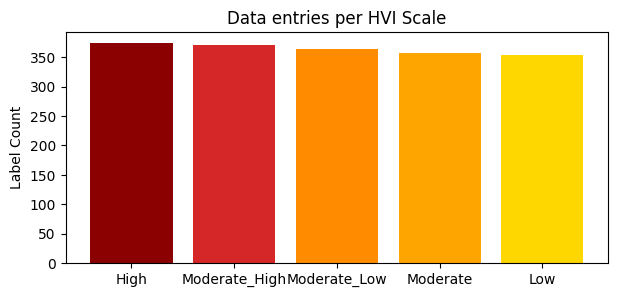

In [100]:
# plot HVI scale to see if data is imbalanced
# data is indeed balanced
hvi_scale = nj_hvi['HVI_Category'].value_counts().reset_index()
fig, ax = plt.subplots()

fig.set_size_inches(7, 3)
labels = hvi_scale['index']
counts = hvi_scale["HVI_Category"]
bar_colors = ['darkred', 'tab:red', 'darkorange', 'orange', 'gold']

ax.bar(labels, counts, color=bar_colors)

ax.set_ylabel('Label Count')
ax.set_title('Data entries per HVI Scale')

plt.show()

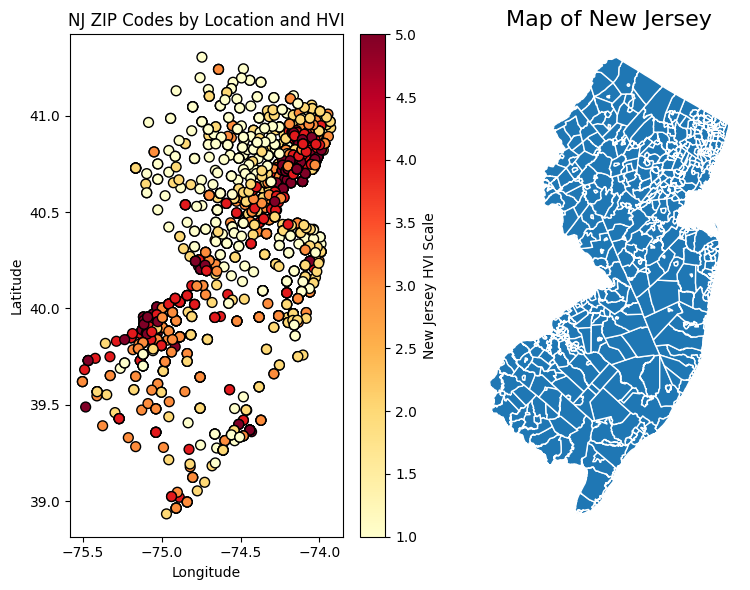

In [99]:
shapefile_path = r"D:\Download\HVIprediction\data\NJ_Municipal_Boundaries_3424.shp"

# Load the shapefile
nj = gpd.read_file(shapefile_path)

# Create a figure with 2 subplots (side by side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))

# --- First Subplot: HVI Scatter Plot ---
sc = ax1.scatter(nj_hvi_num['Lon'], nj_hvi_num['Lat'], 
                 c=nj_hvi_num['HVI_Scale'], cmap='YlOrRd', edgecolor='k', s=50)
cbar = fig.colorbar(sc, ax=ax1, label='New Jersey HVI Scale')

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title('NJ ZIP Codes by Location and HVI')

# --- Second Subplot: NJ Municipal Boundaries ---
nj.plot(ax=ax2, edgecolor='white')

ax2.set_title("Map of New Jersey", fontsize=16)
ax2.set_axis_off()  # Hide axis for better visualization

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure with both plots
plt.show()
